In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['date']= pd.to_datetime(data[['Year', 'month','day']])
data.set_index('date', inplace=True)
data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [4]:
df=data[['Close']].copy()
df

,Close
date,
1998-01-26,0.147936
1998-01-27,0.145558
1998-01-28,0.146034
1998-01-29,0.140802
1998-01-30,0.139374
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
model= ARIMA(df.Close, order=(1,1,1))
model_fit= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8972.381
Date:                Sat, 11 Feb 2023   AIC                          17950.761
Time:                        18:00:03   BIC                          17971.002
Sample:                             0   HQIC                         17957.773
                               - 6292                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3797      0.056      6.732      0.000       0.269       0.490
ma.L1         -0.4378      0.055     -7.914      0.000      -0.546      -0.329
sigma2         1.0146      0.005    211.917      0.000       1.005       1.024
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            199017.12
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):            4894.67   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
print("μ={} ,ϕ={}".format(model_fit.params[0],model_fit.params[1]))

μ=0.3796632573518056 ,ϕ=-0.43775493674133437


In [72]:
pred= model_fit.get_prediction(start=200, end=6000)
pred_conf = pred.conf_int()

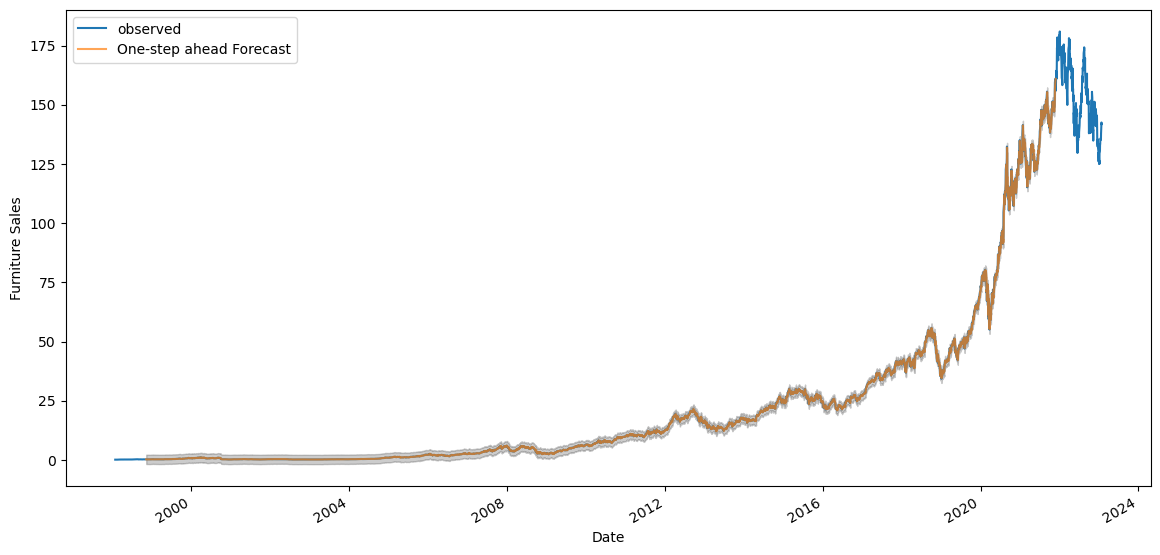

In [73]:
ax = df.Close.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
rmse = math.sqrt(mean_squared_error(df["Close"].diff().dropna().iloc[1000:1101].values, model_fit.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.36487199289810274.


In [49]:
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.tsa.arima_process as arima

<AxesSubplot:xlabel='date'>

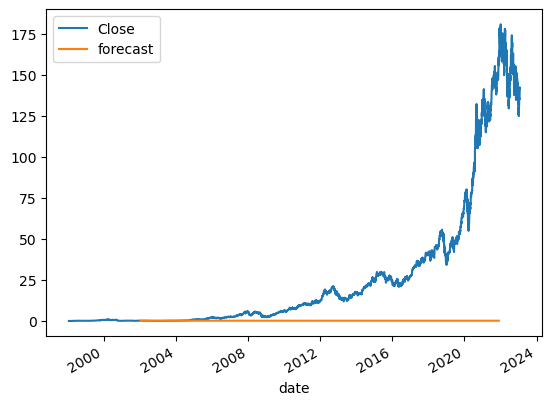

In [92]:
df['forecast']= model_fit.predict(start=1000, end= 6000,dynamic=True)
df[['Close', 'forecast']].plot()

In [53]:
forecast = model_fit.get_prediction(start=len(df), end=len(df)+320, dynamic=False)
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [65]:
fc_series = pd.Series(fc, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df.Close, label='training data')
#plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

IndentationError: unexpected indent (2021720900.py, line 10)

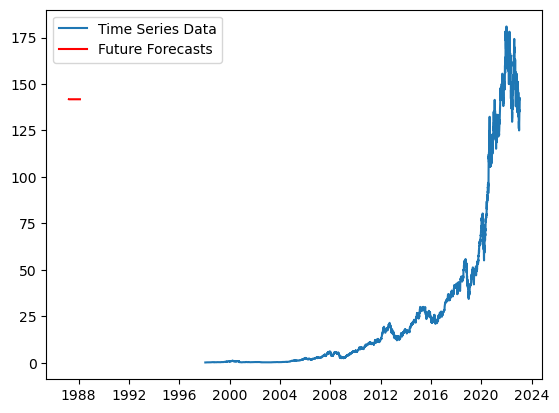

In [62]:
plt.plot(df.Close, label='Time Series Data')
plt.plot(fc, label='Future Forecasts', color='red')
#plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='gray', alpha=0.5)
plt.legend()
plt.show()

In [93]:
import statsmodels.api as sm

In [94]:
model= sm.tsa.statespace.SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,3,12))
results= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

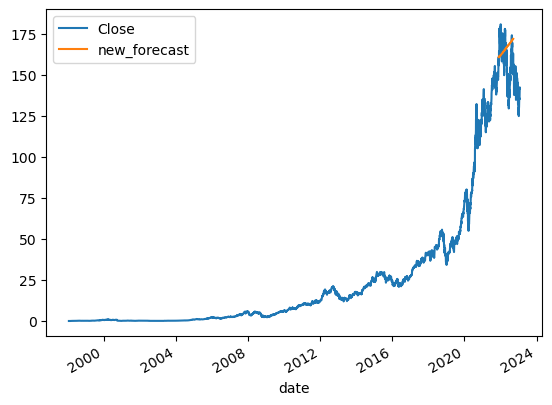

In [101]:
df['new_forecast']=results.predict(start=6000,end=6200,dynamic=True)
df[['Close','new_forecast']].plot()

In [77]:
from pandas.tseries.offsets import DateOffset

In [78]:
future_dates= [df.index[-1]+DateOffset(months=x) for x in range (0,24)]
future_dataset_df= pd.DataFrame(index= future_dates[1:], columns=df.columns)
future_df= pd.concat([df,future_dataset_df])


In [79]:
future_df

,Close,forecast,new_forecast
1998-01-26,0.147936,NaN,NaN
1998-01-27,0.145558,NaN,NaN
1998-01-28,0.146034,NaN,NaN
1998-01-29,0.140802,NaN,NaN
1998-01-30,0.139374,NaN,NaN
...,...,...,...
2024-08-25,NaN,NaN,NaN
2024-09-25,NaN,NaN,NaN
2024-10-25,NaN,NaN,NaN
2024-11-25,NaN,NaN,NaN


<AxesSubplot:>

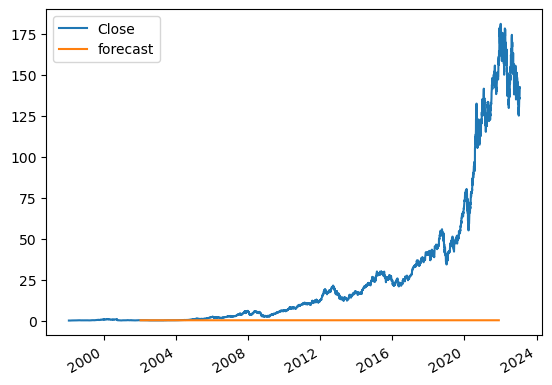

In [81]:
future_df['forecast']=model_fit.predict(start=1000,end=6000,dynamic=True)
future_df[['Close','forecast']].plot()

In [84]:
import pmdarima as pm
model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17948.927, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17970.357, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17953.839, Time=0.76 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17952.725, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17971.492, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17950.341, Time=4.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17950.428, Time=4.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17949.749, Time=1.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17950.802, Time=1.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17958.899, Time=13.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17950.761, Time=1.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 32.775 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:     

In [275]:
ab=data.loc[data['Close']>78,'Close']

In [276]:
ab=pd.DataFrame(ab)

In [277]:
ab

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


<AxesSubplot:xlabel='date'>

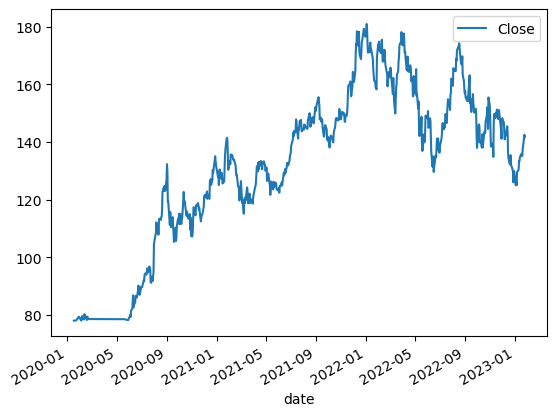

In [278]:
ab.plot()


In [279]:
import pmdarima as pm
model = pm.auto_arima(ab.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3369.209, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3366.960, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3368.366, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3368.308, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3365.726, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.872 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  690
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1681.863
Date:                Fri, 10 Feb 2023   AIC                           3365.726
Time:                        23:54:17   BIC                           3370.261
Sample:                             0   HQIC                          3367.480
                                - 690                                       

In [280]:
from statsmodels.tsa.arima.model import ARIMA

In [281]:
model= ARIMA(ab.Close, order=(0,1,0))
model_fit= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [282]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  690
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1681.863
Date:                Fri, 10 Feb 2023   AIC                           3365.726
Time:                        23:54:25   BIC                           3370.261
Sample:                             0   HQIC                          3367.480
                                - 690                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7227      0.314     24.582      0.000       7.107       8.338
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                65.75
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

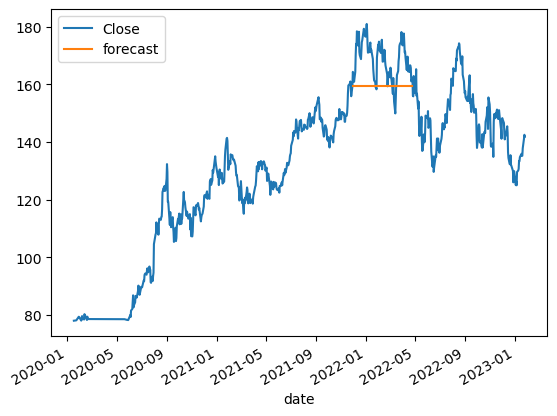

In [283]:
ab['forecast']= model_fit.predict(start=400, end=500,dynamic=True)
ab[['Close', 'forecast']].plot()

In [284]:
model= sm.tsa.statespace.SARIMAX(ab['Close'], order=(0,1,0), seasonal_order=(0,1,0,12))
results= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

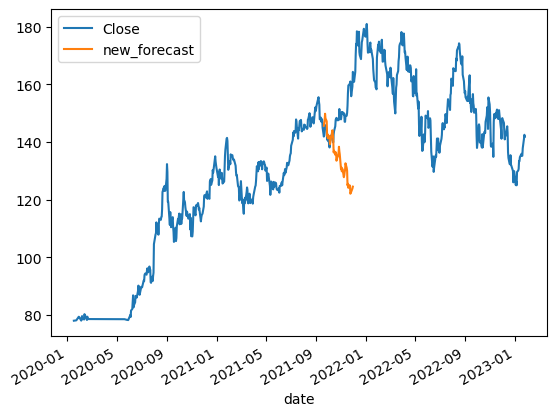

In [285]:
ab['new_forecast']=results.predict(start=350,end=400,dynamic=True)
ab[['Close','new_forecast']].plot()

In [286]:
future_dates= [ab.index[-1]+DateOffset(months=x) for x in range (0,12)]
future_dataset_df= pd.DataFrame(index= future_dates[1:], columns=ab.columns)
future_df= pd.concat([ab,future_dataset_df])


<AxesSubplot:>

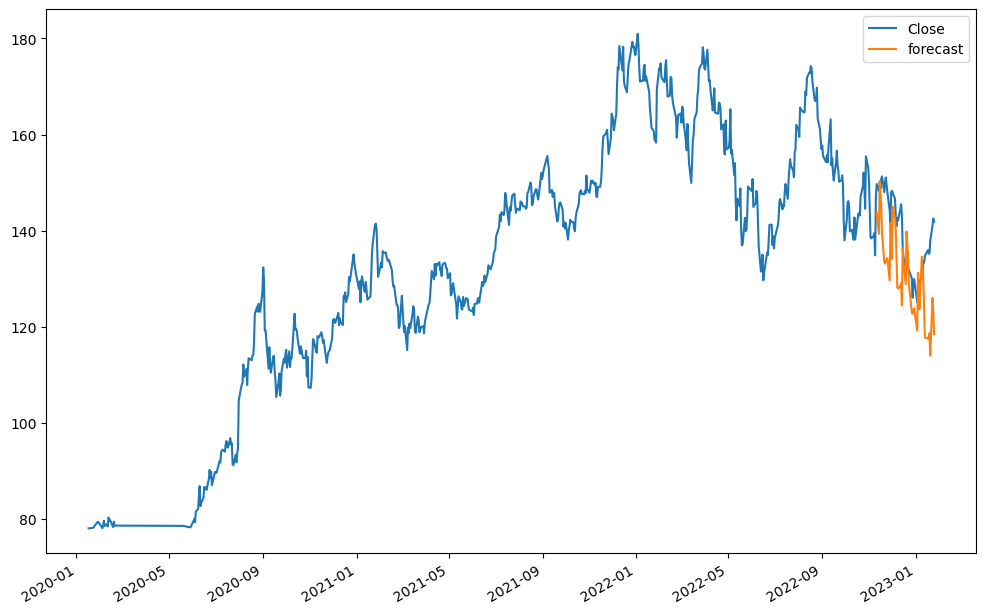

In [287]:
future_df['forecast']=results.predict(start=640,end=689,dynamic=True)
future_df[['Close','forecast']].plot(figsize=(12,8))

In [288]:
future_df

,Close,forecast,new_forecast
2020-01-17,78.063148,NaN,NaN
2020-01-23,78.185600,NaN,NaN
2020-01-29,79.437141,NaN,NaN
2020-01-30,79.322037,NaN,NaN
2020-02-04,78.092545,NaN,NaN
...,...,...,...
2023-08-25,NaN,NaN,NaN
2023-09-25,NaN,NaN,NaN
2023-10-25,NaN,NaN,NaN
2023-11-25,NaN,NaN,NaN
